# Ejercicio 2: flujo de calor 

In [99]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros para el estilo de las gráficas
# Si tienes instalado LaTeX, lo siguiente hace los textos 
# más estilizados. Si no tienes LaTeX, debes comentar la 
# línea: 'text.usetex': True
plt.style.use('seaborn-paper')
params = {'figure.figsize' : (14,7),
          'text.usetex'    : True,
          'xtick.labelsize': 20,
          'ytick.labelsize': 20,
          'axes.labelsize' : 24,
          'axes.titlesize' : 24,
          'legend.fontsize': 24,
          'lines.linewidth': 3,
          'lines.markersize': 10,
          'grid.color'     : 'darkgray',
          'grid.linewidth' : 0.5,
          'grid.linestyle' : '--',
          'font.family': 'DejaVu Serif',
         }
plt.rcParams.update(params)

[1.  0.8 0.6 0.4 0.2 0. ]


Text(0, 0.5, '$T$')

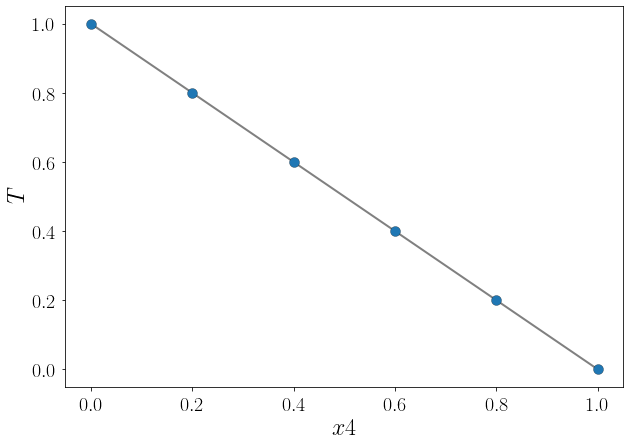

In [100]:
#1.A: Celda 1. La función buildMatrix(N).

def buildMatrix(N):
# Matriz de ceros
 A = np.zeros((N,N))
# Primer rengl ́on
 A[0,0] = 2
 A[0,1] = -1
# Renglones interiores
 for i in range(1,N-1):
  A[i,i] = 2
  A[i,i+1] = -1
  A[i,i-1] = -1
#  ́Ultimo renglon
 A[N-1,N-2] = -1
 A[N-1,N-1] = 2
 return A

#1.B: Celda 2. Los parámetros físicos y numéricos.
L = 1.0
TA = 1
TB = 0
k = 1.0
S = 0.0
N = 4
h = L/(N+1)
r = k/h**2

#1.C: Celda 3. El código que resuelve el problema y grafica la solución.
#Arreglo para almacenar la solución
T = np.zeros(N+2)
T[0] = TA
T[-1] = TB

b = np.zeros(N)
b[:] = S/r
b[0] += T[0]
b[-1] += T[-1]

#Construcción de la matriz
A = buildMatrix(N)

#Solución del sistema lineal
T[1:N+1] = np.linalg.solve(A,b)

print(T)
x = np.linspace(0,L, N+2)
plt.figure(figsize = (10,7))
plt.plot(x, T, c='grey', lw=2.0)
plt.scatter(x,T, edgecolor='k', zorder=10)
plt.xlabel('$x4$')
plt.ylabel('$T$')


In [101]:
#2.A: Funcion def solExact(x, TA, TB, k, L, S):

def solExacta(x, TA, TB, k, L, S):
  return ((TB -TA)/L+(S/(2*k))*(L-x))*x+TA

#2.B: Función def solNum(L, N, k, S, A, b, T, etiqueta):

def solnum(L,N,k,S, A,b,T, etiqueta):
    h = L/(N+1)
    r = k/h**2
    
    #Lado derecho del sistema
    b = np.zeros(N)
    b[:] = S/r #Fuente o sumidero
    b[0] += T[0] #Condición de frontera
    b[-1] += T[-1] # Condición de frontera
    
    # Solución del sistema lineal
    T[1:N+1] = np.linalg.solve(A,b)
    
    #Impresión y graficación de la solución
    x = np.linspace(0, L, N+2)
    
    # Construcción de la etiqueta de cada gráfica
    if etiqueta == 'L':
        etiqueta = '$L$ = {:3.2f}.format(L)'.format(L)
    elif etiqueta == 'k':
        etiqueta = '$\kappa$ = {:3.2f}'.format(k)
    elif etiqueta == 'S':
        etiqueta = '$S$ = {:3.2f}'.format(S)
    
    plt.scatter(x, T, edgecolor='k', s=50, zorder=10, label=etiqueta)
    

#2.C: Función def plotSol(title, filename):

def plotSol(title, filename):
   plt.suptitle('Conduccion estacionaria',fontsize =24,y=0.94,va='center_baseline')
   plt.title(title , fontsize =20, color= 'blue')
   plt.ylabel('$T$')
   plt.xlabel('$x$')
   plt.legend(loc='center left', bbox_to_anchor =(1, 0.5), fontsize =12)
   plt.grid()
   plt.savefig(filename)
   plt.show()




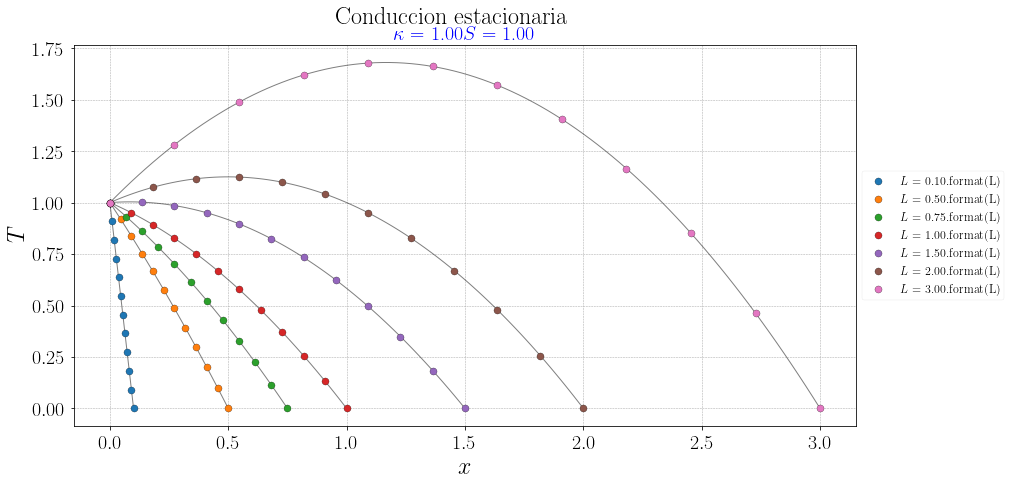

In [102]:
#3: Variando la longitud del dominio (L).

# Par ́ametros f ́ısicos
l = [0.1, 0.5, 0.75, 1.0, 1.5, 2.0, 3.0]
TA = 1.0
TB = 0.0
k = 1.0
S = 1.0
# Parametros num ́ericos
N = 10
# Arreglo para almacenar la soluci ́on
T = np.zeros(N+2)
T[0] = TA # Frontera izquierda
T[-1] = TB # Frontera derecha

# Construcción de la matriz

A = buildMatrix(N)

for L in l: 
    solnum(L,N,k,S,A,b,T,'L')
    xe = np.linspace(0,L,100)
    plt.plot(xe, solExacta(xe,TA,TB,k,L,S), 'k-', lw=1.0, alpha = 0.5)
    
    

plotSol('$\kappa$ = {:3.2f}'.format(k) + '$S$ = {:3.2f}'.format(S), 'nombre_archivo.pdf')
    

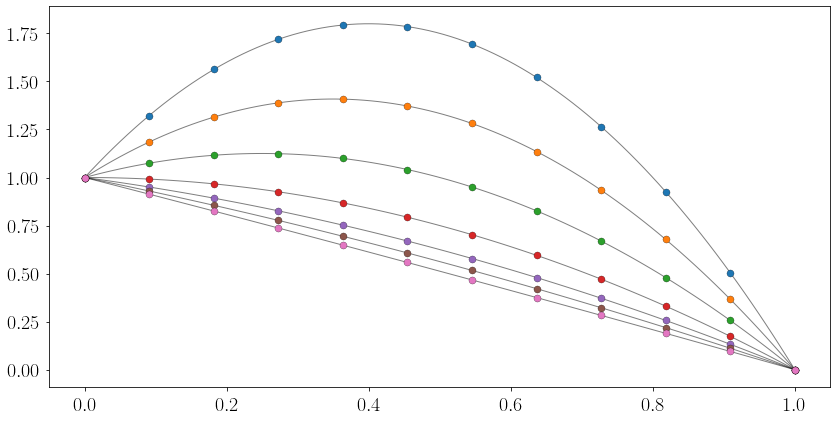

In [103]:
#4.A: Variando la conductividad térmica (k).
# Parametros fısicos
l = 1.0
TA = 1.0
TB = 0.0
k = [0.1, 0.15, 0.25, 0.5, 1.0, 2.0, 10]
S = 1.0
# Parametros num ́ericos
N = 10
# Arreglo para almacenar la soluci ́on
T = np.zeros(N+2)
T[0] = TA # Frontera izquierda
T[-1] = TB # Frontera derecha

# Construcción de la matriz

A = buildMatrix(N)

for K in k: 
    solnum(l,N,K,S,A,b,T,'L')
    xe = np.linspace(0,l,100)
    plt.plot(xe, solExacta(xe,TA,TB,K,l,S), 'k-', lw=1.0, alpha = 0.5)


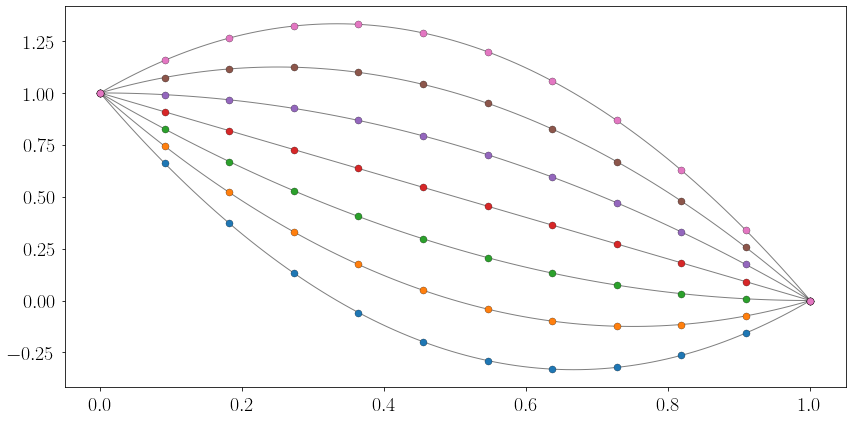

In [106]:
#5.A: Variando la fuente (k).
# Parametros fısicos
l = 1.0
TA = 1.0
TB = 0.0
k = 1.0
S = [-6.0, -4.0, -2.0, 0.0, 2.0, 4.0, 6.0]
# Parametros num ́ericos
N = 10
# Arreglo para almacenar la soluci ́on
T = np.zeros(N+2)
T[0] = TA # Frontera izquierda
T[-1] = TB # Frontera derecha

# Construcción de la matriz

A = buildMatrix(N)

for s in S: 
    solnum(l,N,k,s,A,b,T,'L')
    xe = np.linspace(0,l,100)
    plt.plot(xe, solExacta(xe,TA,TB,k,l,s), 'k-', lw=1.0, alpha = 0.5)